# Caso difícil: Mundos 1 y 4
Para este caso se tomaron las imágenes del mundo 1 y 4, pues ambos mundos son muy parecidos. Primero importamos las librerías a usar.


In [2]:
import zipfile
import os 
import math
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn import preprocessing, model_selection
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Ahora podemos comparar los 4 niveles de cada mundo para observar que tan parecidos son:

Text(0.5, 1.0, 'Mundo 4')

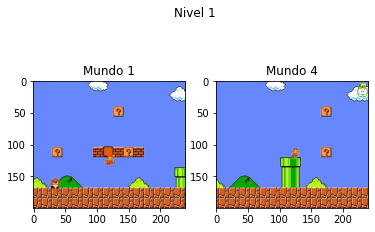

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Nivel 1')
ax1.imshow(plt.imread('p_260.jpg'))
ax1.set_title('Mundo 1')
ax2.imshow(plt.imread('p_123.jpg'))
ax2.set_title('Mundo 4')

Text(0.5, 1.0, 'Mundo 4')

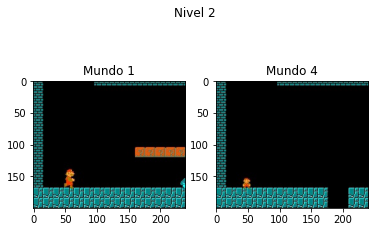

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Nivel 2')
ax1.imshow(plt.imread('p_2198.jpg'))
ax1.set_title('Mundo 1')
ax2.imshow(plt.imread('p_2106.jpg'))
ax2.set_title('Mundo 4')

Text(0.5, 1.0, 'Mundo 4')

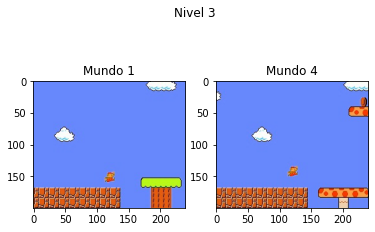

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Nivel 3')
ax1.imshow(plt.imread('p_4917.jpg'))
ax1.set_title('Mundo 1')
ax2.imshow(plt.imread('p_4396.jpg'))
ax2.set_title('Mundo 4')

Text(0.5, 1.0, 'Mundo 4')

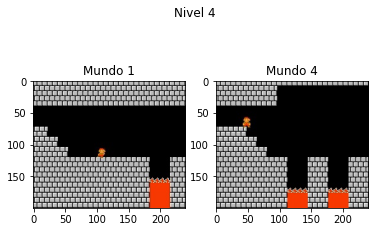

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Nivel 4')
ax1.imshow(plt.imread('p_6947.jpg'))
ax1.set_title('Mundo 1')
ax2.imshow(plt.imread('p_6217.jpg'))
ax2.set_title('Mundo 4')

Se instala la version 1.14.0 de tensorflow para no tener problemas en la creación de la red convolucional.

In [1]:
!pip install tensorflow==1.14.0

Las imágenes se guardaron en archivos zip. Por lo cual, se cargan los archivos de ambos mundos.

In [0]:
mundo1 = zipfile.ZipFile("Mun1.zip", mode="r")
mundo1.extractall(None)
mundo4 = zipfile.ZipFile("Mundo4.zip", mode="r") 
mundo4.extractall(None)

# Se definen las varibales X y Y
La variable X será una matriz de 200x240x3 pixeles pues se carga en formato RGB.
La variable Y es el mundo al que pertenece cada imagen. Se toma un 0 para el mundo 1 y 1 para el mundo 4. Sin embargo se define por catgorias, por lo cual es un vector de 1x2.

In [4]:
imagenes = []
nivel = []
imagenes1 = mundo1.namelist()
imagenes4 = mundo4.namelist()
#Se agregan las imagenes del mundo 1
i = 1
while(i<len(imagenes1)):
  filepath = os.path.join("", imagenes1[i]) 
  image = plt.imread(filepath)
  imagenes.append(image)
  nivel.append(0)
  i += 1
#Se agreagan las imagenes del mundo 8
i = 1
while(i<len(imagenes4)):
  filepath = os.path.join("", imagenes4[i]) 
  image = plt.imread(filepath)
  imagenes.append(image)
  nivel.append(1)
  i += 1
#Se define la salida por categorias, para que se puedan distinguir las clases.
Y = to_categorical(np.array(nivel))
X = np.array(imagenes, dtype=np.uint8)  
print('Dimensiones de las variables: ', X.shape, Y.shape)

Dimensiones de las variables:  (16385, 200, 240, 3) (16385, 2)


#Preprocesamiento de datos


1.   Se realiza el conjunto de entrenamiento al tomar el 10% de los datos totales.
2.   Se realiza el conjunto de validación al tomar el 10% de los datos de entrenamiento.

In [0]:
#Se definen los porcentajes de entrenamiento y validación
porcentajeEntrenamiento = 0.8
porcentajeValidación = 0.9
#Se determinan los datos de entrenamiento, prueba y validación
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = model_selection.train_test_split(X,Y,test_size=1-porcentajeEntrenamiento)
x_entrenamiento, x_validacion, y_entrenamiento, y_validacion = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajeValidación)

# Normalización de píxeles
Se usa la clase de keras ImageDataGenerator para reescalar los valores de los pixeles del rango 0-255 al 0-1. 

In [13]:
# crear y configurar el generador de datos. La relación es 1/255
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Se crean iteradores para los datos de entrenamiento, validación y prueba
train_iterator = datagen.flow(x_entrenamiento, y_entrenamiento, batch_size=64)
validation_iterator = datagen.flow(x_validacion, y_validacion, batch_size=64)
test_iterator = datagen.flow(x_prueba, y_prueba, batch_size=64)
print('Batches train=%d, validation=%d, test=%d' % (len(train_iterator), len(validation_iterator), len(test_iterator)))

#Se verifica que la normalización de los datos se realizó como se esperaba de 0 a 1.
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Batches train=185, validation=21, test=52
Batch shape=(64, 200, 240, 3), min=0.000, max=1.000


# Se crea la red neuronal
Esta red se creó basada en el modelo de la referencia [1]. Las características son las siguientes:
1. La red neuronal se realizará a partir de keras
2. La red va a ser de tipo sequencial, para poder trabajar con diferentes capas, que se encarguen de diferentes funciones.
3. La primera capa es de tipo Conv2D, esto con el fin de especificar que se esta recibiendo una imagen de dimenciones (200,240,3). Tambien se especifica que su activación es de tipo relu, ya que siempre se recomienda hacer pooling justo despues de haber aplicado una capa con no-linealidad. El número de neuronas iniciales es 32.
4. Lo siguiente es utilizar MaxPooling2D, para agrupar la presencia de aquellos patrones que se repiten con mayor frecuencia en cada segmento de la imagen.
5. De nuevo se crea una capa de tipo Conv2D con 64 neuronas y activación relu.
6. De igual manera, se agrega otro MaxPooling2D.
7. Se utiliza flatten para acoplar los datos que salen de la anterior capa y ajustarlos para que sirvan como entrada de la capa escondida de clasificación que se utiliza.
8. Se establece una capa conectada para clasificación y se utiliza una activacion tipo relu, ya que sabemos suele entregar los mejores resultados en clasificación.
9. Se crea una capa se salida con activación softmax para comprimir los datos obtenidos por la capa de clasificación, el número de neuronas es el número de cada salida.
10. Por ultimo se realiza la compilación de la red, la cual cuenta con:
Entropia cruzada como función de error, dado que estamos haciendo un clasificador.
Adam como algoritmo de optimización.
Ademas tambien se indica que debe retornar el porcentaje de aciertos del entrenamiento.


In [9]:
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 240, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Se entrena y evalua el modelo
Se usa el generados de datos usado con 20 épocas.

In [10]:
# Se entrena el modelo con generador de datos usado.
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=20)
# Se evalua el modelo con los datos de validation y el generador usado.
_, acc = model.evaluate_generator(validation_iterator, steps=len(validation_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
185/185 [==============================] - 314s 2s/step - loss: 0.3098 - acc: 0.8695
Epoch 2/20
185/185 [==============================] - 313s 2s/step - loss: 0.0630 - acc: 0.9765
Epoch 3/20
185/185 [==============================] - 314s 2s/step - loss: 0.0417 - acc: 0.9833
Epoch 4/20
185/185 [==============================] - 312s 2s/step - loss: 0.0311 - acc: 0.9870
Epoch 5/20
185/185 [==============================] - 311s 2s/step - loss: 0.0211 - acc: 0.9910
Epoch 6/20
185/185 [==============================] - 317s 2s/step - loss: 0.0171 - acc: 0.9924
Epoch 7/20
185/185 [==============================] - 321s 2s/step - loss: 0.0157 - acc: 0.9926
Epoch 8/20
185/185 [==============================] - 312s 2s/step - loss: 0.0136 - acc: 0.9939
Epoch 9/20
185/185 [==============================] - 307s 2s/step - loss: 0.0117 - acc: 0.9940
Epoch 10/20
185/185 [====================

# Se guarda el modelo utilizado

In [0]:
model.save("CasoDificil.h5py")

# Se evaluan los datos de prueba



In [33]:
_, acc_test = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc_test * 100))

Test Accuracy: 99.390


# Análisis de la red
Una vez evaluado el error empirico y teniendo en cuenta el número de datos, se observa que el indice de confianza es :
##$(1-\delta) = (1 - 2/\exp(|S{\small text}|{ \cdot 2\varepsilon^2 }))$

In [37]:
#Se calcula el erro empirico, numero de datos y indice de confianza
E_empirico = 1 - 0.9939
N_datos = y_prueba.shape[0]
confianza = 1-((1 - 2/math.exp(N_datos*2*(E_empirico**2))))
print('Número de datos de prueba = ' + str(N_datos))
print('Error empirico = ' + str(E_empirico))
print('indice de confianza = ' + str(confianza))

Número de datos de prueba = 3277
Error empirico = 0.006099999999999994
indice de confianza = 1.567172187010098


El índice de confianza es mayor a 1, porque el error es muy pequeño.

# Sin normalizar píxeles
Cuando se estaba creando la red, no se tomó en cuenta normalizar los datos. Se usó el mismo modelo anterior, pero se observó que la exactitud de cada época en el entrenamiento no pasaba el 50% y no variaba mucho. De igual, forma se probaron otros modelos, pero seguía pasando lo mismo. Esto lo podemos observar a continuación:

In [6]:
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 240, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Se entrena la red
history = model.fit(x_entrenamiento, y_entrenamiento, batch_size=100, epochs=3)
score, acuraccy = model.evaluate(x_validacion, y_validacion, batch_size=100)

print('Test Accuracy: %.3f' % (acuraccy * 100))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/3
11797/11797 [==============================] - 322s 27ms/step - loss: 8.1963 - acc: 0.4911
Epoch 2/3
11797/11797 [==============================] - 317s 27ms/step - loss: 8.2114 - acc: 0.4905
Epoch 3/3
1311/1311 [==============================] - 11s 9ms/step
Test Accuracy: 48.589


Para el caso fácil no fue necesario normalizar los datos, puesto que los mundos 1 y 8 son muy diferentes, entonces se logró clasificarlos mejor. Sin embargo, al ser tan idénticos los mundos 1 y 4, se necesitó mejorar el procesamiento de los datos antes de entrenarlos en la red.

#Referencias


*   [1]   Brownlee, J. (2019). "How to Normalize, Center, and Standardize Image Pixels in Keras", Machine Learning Mastery. [Online]. Available: https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/ [Accessed: 30- Mar- 2020].
*   [2]   "Home - Keras Documentation", Keras.io, 2020. [Online]. Available: https://keras.io/. [Accessed: 20- Mar- 2020].
*   [3]   "Clasificación de Imágenes en Python", Aprende Machine Learning, 2020. [Online]. Available: https://www.aprendemachinelearning.com/clasificacion-de-imagenes-en-python/. [Accessed: 20- Mar- 2020].

